# TP3 : Filtres et convolution

## 1. Filtre passe-bas et convolution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

(508, 509)


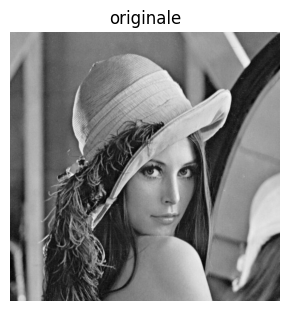

In [ ]:
def show_images(images,mode=255,gray=False,titre=[""]):
    n=len(images)
    fig=plt.figure( figsize=(3*n, 5*n))
    axs=[]
    
    for i in range(n):
        axs.append( fig.add_subplot(1,n,i+1) )
        axs[i].set_title(titre[i])
        plt.axis('off')
        im = np.clip(images[i], 0, mode)
        if gray:
            plt.imshow(im,cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(im)
    fig.tight_layout()  
    plt.show()
    
def normalize(image):
    r_img=np.copy(image)
    return (r_img-r_img.min())/(r_img.max()-r_img.min())

def log_image(image):
    l_img=np.log(1+np.abs(image))
    r_img=np.copy(l_img)
    r_img=normalize(r_img) #normalisation
    return r_img


masque1=np.array([[1,2,1],[2,4,2],[1,2,1]])*(1/16)
masque2=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
masque3=np.array([[1,4,6,4,1],[4,8,14,8,4],[6,14,28,14,6],[4,8,14,8,4],[1,4,6,4,1]])*(1/176)

masque4=np.array([[-1,-1,-1,-1,-1],[-1,0,0,0,-1],[-1,0,32,0,-1],[-1,0,0,0,-1],[-1,-1,-1,-1,-1]])*(1/16)
img = normalize(plt.imread('lena.jpg').astype(float))
print(img.shape)
show_images([img],255,True,["originale"])

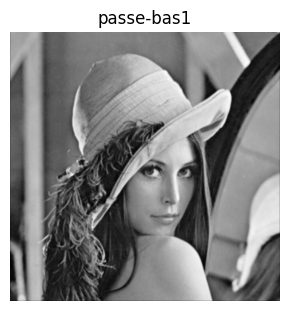

In [18]:
def convolution(arr1,arr2):
    n1,n2=arr1.shape
    n3,n4=arr2.shape
    imgf=np.copy(arr1).astype(float)
    pad_row=n4//2
    pad_col=n3//2
    imgf=np.pad(imgf, [pad_row,pad_col], mode='constant', constant_values=0) #contour 0
    imgr=np.zeros((n1,n2),dtype=float)
    for i in range(n1):
        for j in range(n2):
            imgr[i,j]= np.sum( imgf[i:i+n3,j:j+n4]*arr2)
    return imgr

def eqm(arr1,arr2):
    return np.sum((arr1-arr2)**2)/(arr1.shape[0]*arr1.shape[1])

img2=convolution(img,masque1)
show_images([img2],1,True,["passe-bas1"])

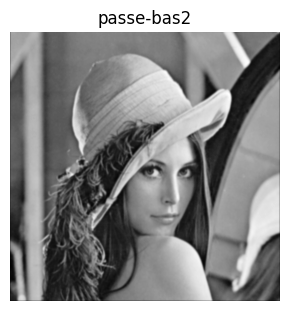

In [19]:
img3=convolution(img,masque3)
show_images([img3],1,True,["passe-bas2"])

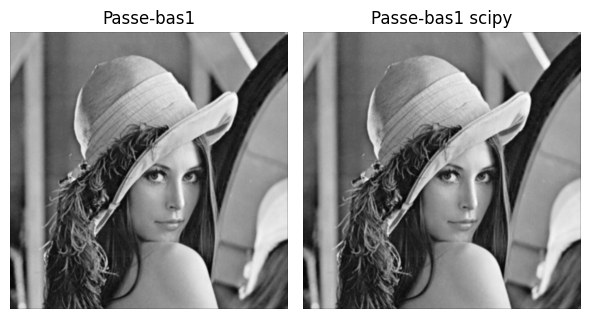

3.9892003695708785e-33


In [20]:
img4= signal.convolve2d(img, masque1, boundary='fill', mode='same')
img5= signal.convolve2d(img, masque3, boundary='fill', mode='same')
show_images([img2,img4],1,True,["Passe-bas1","Passe-bas1 scipy"])
print(eqm(img2,img4))

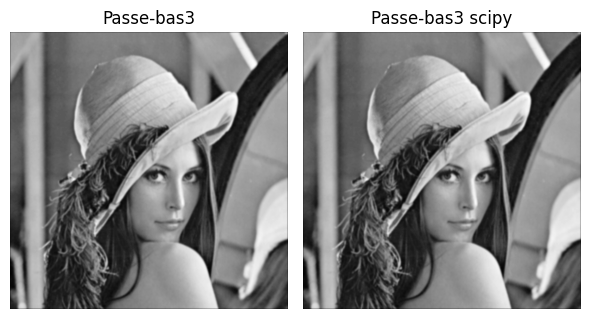

8.002519646539086e-33
[[0.30788678 0.40056818 0.43796914 ... 0.46411072 0.42467681 0.32394183]
 [0.40234049 0.52311822 0.57459341 ... 0.5980244  0.54222269 0.41245309]
 [0.44125313 0.57547957 0.63076001 ... 0.62122081 0.5582256  0.41730088]
 ...
 [0.08345496 0.11535655 0.1271372  ... 0.29615826 0.28841743 0.22711635]
 [0.07104879 0.09990096 0.10970079 ... 0.28565471 0.2756985  0.21762927]
 [0.05157944 0.07498436 0.08251668 ... 0.22633445 0.2171862  0.17089762]]


In [21]:
show_images([img3,img5],1,True,["Passe-bas3","Passe-bas3 scipy"])
print(eqm(img3,img5))
print(img3)

## 2. Filtre passe-haut et convolution

In [22]:
img6= signal.convolve2d(img, masque2, boundary='fill', mode='same')
img7= signal.convolve2d(img, masque4, boundary='fill', mode='same')
img8=convolution(img,masque2)
img9=convolution(img,masque4)

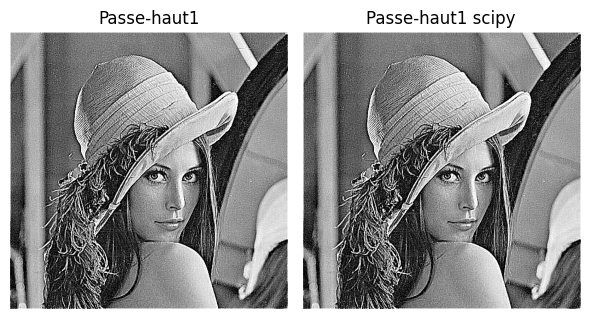

1.3773444576107815e-31


In [23]:
show_images([img6,img8],1,True,["Passe-haut1","Passe-haut1 scipy"])
print(eqm(img6,img8))

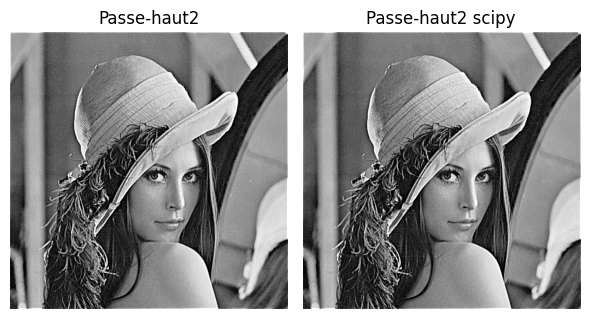

1.85017885697581e-32


In [24]:
show_images([img7,img9],1,True,["Passe-haut2","Passe-haut2 scipy"])
print(eqm(img7,img9))

## 3. Représentation fréquentielle 

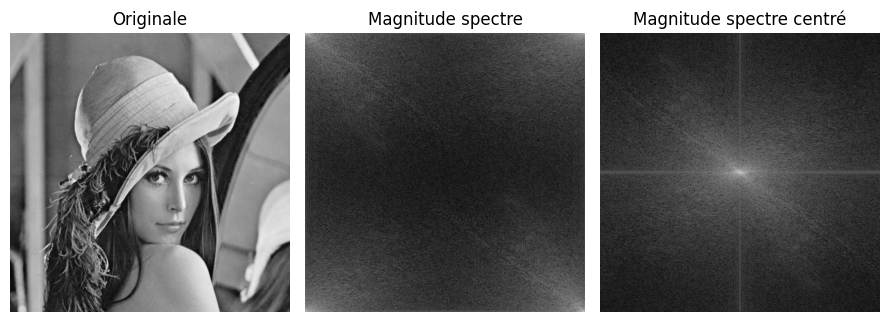

In [25]:
fft=np.fft.fft2(img)
fft1=np.fft.fft2(img5)
fft2=np.fft.fft2(img9)
magnitude_spectrum = log_image(fft)
magnitude_spectrum_centered= log_image(np.fft.fftshift(fft))
magnitude_spectrum1 = log_image(fft1)
magnitude_spectrum_centered1= log_image(np.fft.fftshift(fft1))
magnitude_spectrum2 = log_image(fft2)
magnitude_spectrum_centered2= log_image(np.fft.fftshift(fft2))
show_images([img,magnitude_spectrum,magnitude_spectrum_centered],mode=1,gray=True,titre=["Originale","Magnitude spectre","Magnitude spectre centré"])

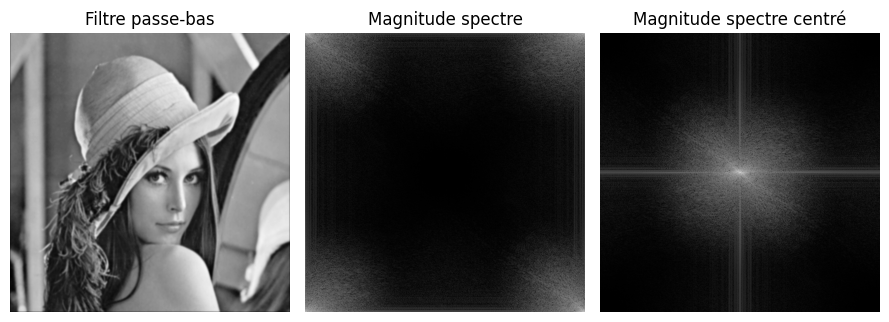

In [26]:
show_images([img5,magnitude_spectrum1,magnitude_spectrum_centered1],mode=1,gray=True,titre=["Filtre passe-bas","Magnitude spectre","Magnitude spectre centré"])

On a vu dans le tp2 que les hautes fréquences sont au centres et les basses frequences sont sur les bords.

Après le filtre passe-bas on voit bien que le centre s'est assombri sur le spectre non centré. Ou encore les bords se sont assombri sur le spectre centré.

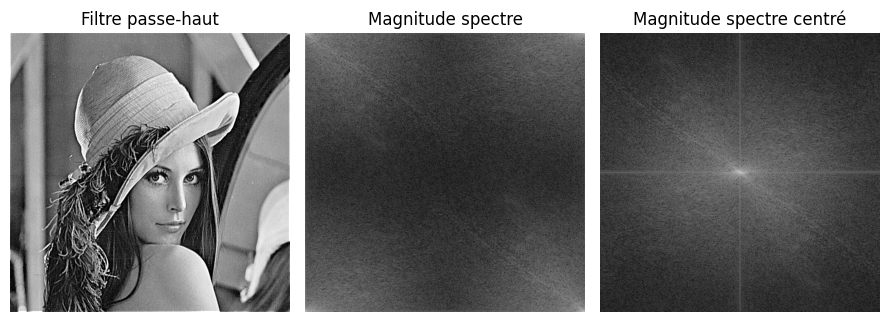

In [27]:
show_images([img9,magnitude_spectrum2,magnitude_spectrum_centered2],mode=1,gray=True,titre=["Filtre passe-haut","Magnitude spectre","Magnitude spectre centré"])

### Comparaison erreur quadratique entre passe-haut originale et passe-bas originale

In [28]:
print(f'L\'erreur quatratique entre l\'image originale et celle filtrée passe-bas vaut {eqm(img,normalize(img5))}')

L'erreur quatratique entre l'image originale et celle filtrée passe-bas vaut 0.0011687159111981238


In [ ]:
print(f'L\'erreur quatratique entre l\'image originale et celle filtrée passe-haut vaut {eqm(img,normalize(img9))}')

L'erreur quatratique entre l'image originale et celle filtrée passe-haut vaut 0.008431107371304642


Les frequences basses semblent être prépondérantes sur l'erreur quadratique moyenne